## Imports

In [65]:
import pandas as pd
import numpy as np

In [66]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [67]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [68]:
def read_csv(filepath):
    """Read csv file via filepath"""
    
    df = pd.read_csv(filepath)
    return df

In [69]:
data_path  =r'/home/alahira/Documents/Data science projects/Xente_Fraud_Detection_Challenge/Data/'

In [70]:
df = read_csv(data_path + 'raw/training.csv')

## Explore and Process Data

In [71]:
## check first 5 rows

In [72]:
df.head(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [73]:
##check last 5 rows 

In [74]:
df.tail(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

<br />

**Observations**

- Dataset does not contain null values
- Dataset is made up of 11 categorical variables 

In [76]:
## drop duplicate values

In [77]:
df.drop_duplicates()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [78]:
## iterate through column and print unique values in rach column

In [79]:
for col_name, col_data in df.iteritems():
    print(col_name , " " , len(col_data.unique()))

TransactionId   95662
BatchId   94809
AccountId   3633
SubscriptionId   3627
CustomerId   3742
CurrencyCode   1
CountryCode   1
ProviderId   6
ProductId   23
ProductCategory   9
ChannelId   4
Amount   1676
Value   1517
TransactionStartTime   94556
PricingStrategy   4
FraudResult   2


<br />

**Observation**

- TranscationId, BatchId, SubscriptionId, CustomerId, AccountId all have high cardinality and would be dropped for now. Subsequently we could try to generate more features from it
- CurrencyCode and CountryCode only have one category and would not add anything to our model. They would therefore be dropped

In [80]:
def drop_columns(dataframe, *columns):
    """Drop list of columns from dataframe
    
        Parameters:
        
            dataframe (pandas dataframe): dataframe to drop columns
            *columns(iterable) :columns to drop
        
        Returns:
            new dataframe
    """
    
    for arg in columns:
        dataframe.drop(arg, inplace = True, axis = 1)
        
        
    return dataframe

In [81]:
## drop columns

In [82]:
df_dropped = drop_columns(df, 'TransactionId', 'BatchId', 'AccountId','SubscriptionId', 'CustomerId', 'CurrencyCode','CountryCode')

In [83]:
## check first 5 rows of new dataframe: df_dropped

In [84]:
df_dropped.head(5)

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [85]:
## get  categorical data

**TransactionStartTime**

- Split TransactionStartTime into year, month, day and hour 

In [86]:
def split_time_column(dataframe, column):
    """split time column 
        Parameter:
            dataframe (pandas dataframe): dataframe to drop columns
            column (pandas series): time column to split
        
        Returns:
            dataframe
    """
    new_df = pd.DataFrame()
    
    new_df['TransactionYear'] = dataframe[column].str.split('-').str[0].astype('int') 
    new_df['TransactionMonth'] = dataframe[column].str.split('-').str[1].astype('int') 
    new_df['TransactionDay'] = dataframe[column].str.split('-').str[2] 
    new_df['TransactionDay'] = new_df['TransactionDay'].str[0:2].astype('int')
    new_df['TransactionHour'] = dataframe[column].str[11:13].astype('int')
    
    return new_df

In [87]:
new_df = split_time_column(df_dropped, 'TransactionStartTime')

In [88]:
## check first 5 rows of new_df

In [89]:
new_df.head(5)

,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
0,2018,11,15,2
1,2018,11,15,2
2,2018,11,15,2
3,2018,11,15,3
4,2018,11,15,3


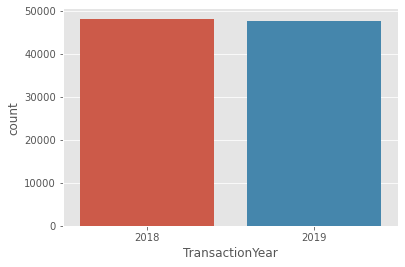

In [90]:
sns.countplot(new_df['TransactionYear'])

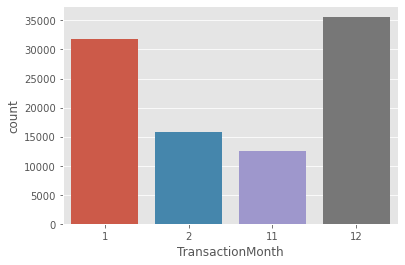

In [91]:
sns.countplot(new_df['TransactionMonth'])

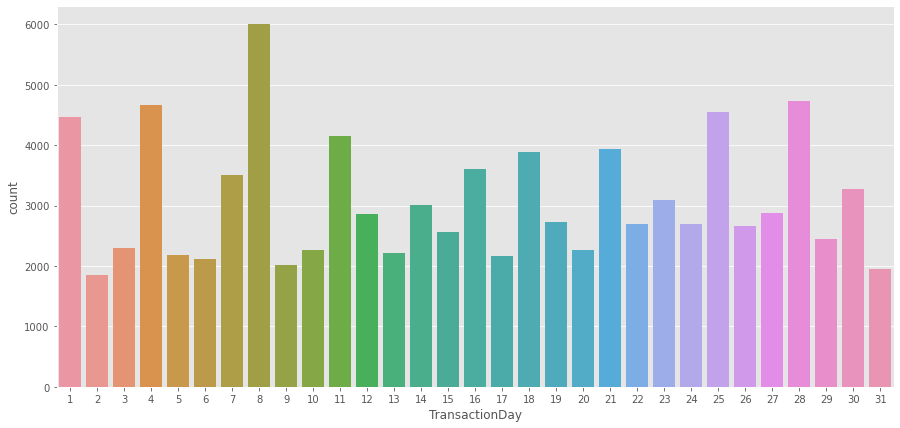

In [92]:
plt.figure(figsize= (15,7))
sns.countplot(new_df['TransactionDay'])

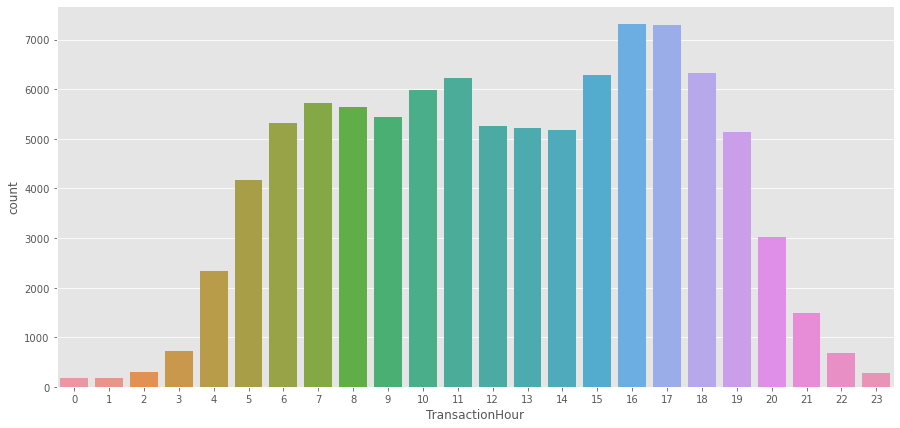

In [93]:
plt.figure(figsize= (15,7))
sns.countplot(new_df['TransactionHour'])

<br />

**Observations**

- Only four months of data was recorded (Jan, Feb, Nov, Dec)
- More transactions take place within the months of January and March. This might be due to the festivities
- There was significantly more transaction on the 8th day of the months. Reasons for this are currently unknown
- During the day, the most transactions occur around 4 and 5 pm.  

<br />

**ProvideId**

- explore distribution

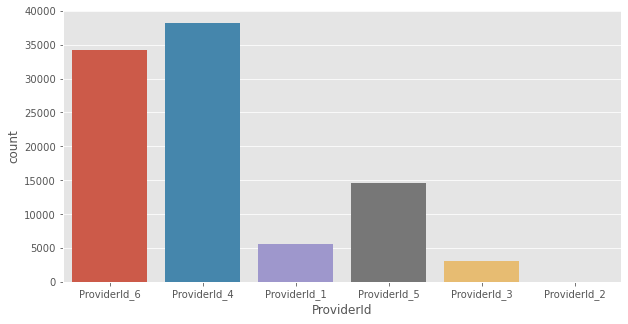

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(df_dropped['ProviderId'])

<br />

**Observations**

- Provider_6 and Provider_4 have majority of the market share while Provider_2 is yet to penetrate the  markey effectively

<br />

**ProductId**

- explore distribution

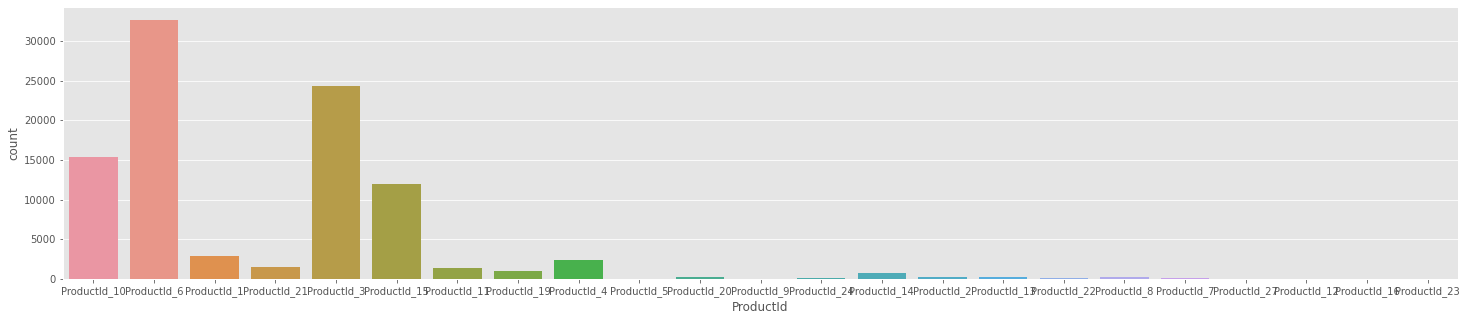

In [95]:
plt.figure(figsize=(25,5))
sns.countplot(df_dropped['ProductId'])

In [96]:
df_dropped['ProductId'].value_counts()

ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: ProductId, dtype: int64

In [97]:
pd.crosstab(df_dropped['ProductId'], df_dropped['ProviderId'])

ProviderId,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6
ProductId,,,,,,
ProductId_1,210,1,49,80,634,1911
ProductId_10,656,8,696,2226,1213,10585
ProductId_11,66,1,62,68,189,991
ProductId_12,0,0,2,0,0,0
ProductId_13,29,0,36,14,85,132
ProductId_14,31,0,27,0,228,503
ProductId_15,3422,0,1186,0,7352,4
ProductId_16,2,0,1,0,1,6
ProductId_19,49,0,9,24,123,760


<br />

**Observations**

- Four major products currently dominate the market and they include ProductId_6, ProductId_3, ProductId_10, ProductId_15
- ProviderId_4 has a monoploy over the sale of ProductId_6 as they are responsible for producing an overwhelming amount,
- ProviderId_6 is the major producer of ProductId_3 and is responsible for producing over half of the number purchased
- ProviderId_6 is also the leading producer of ProductId_10

<br />

**ProductCategory**

- Visualize distribution 

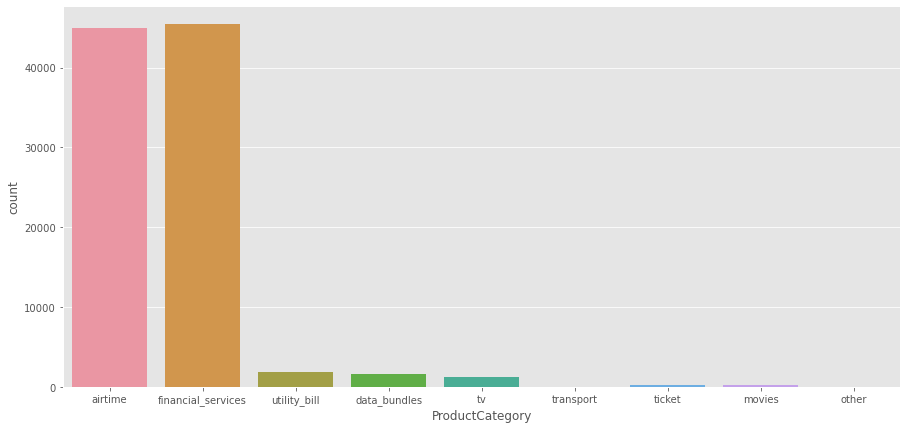

In [98]:
plt.figure(figsize=(15,7))
sns.countplot(df_dropped['ProductCategory'])

In [99]:
pd.crosstab(df_dropped['ProductCategory'], df_dropped['ProviderId'])

ProviderId,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6
ProductCategory,,,,,,
airtime,1770,14,1540,5337,6009,30357
data_bundles,88,3,63,80,217,1162
financial_services,3454,0,1213,32629,7596,513
movies,43,0,9,2,54,67
other,0,0,2,0,0,0
ticket,50,0,10,0,90,66
transport,11,0,2,0,10,2
tv,75,0,68,37,181,918
utility_bill,152,1,177,104,385,1101


<br />

**Observation**

- airtime and financial services are the most purchased product categories in the market
- ProviderId_6 has a monopoly of the sale of airtime. 
- ProviderId_4 is the largest provider of financial services in the market.

<br />

**ChannelId**

- visualize distribution

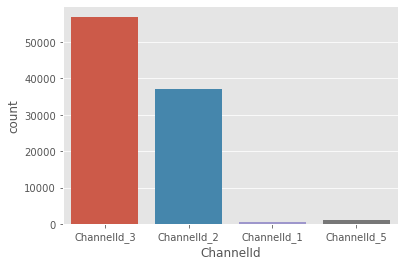

In [100]:
#plt.figure(figsize=(15,7))
sns.countplot(df_dropped['ChannelId'])

In [101]:
pd.crosstab(df_dropped['ChannelId'], df_dropped['ProviderId'])

ProviderId,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6
ChannelId,,,,,,
ChannelId_1,43,0,73,0,89,333
ChannelId_2,0,0,0,37141,0,0
ChannelId_3,5600,18,3011,0,14453,33853
ChannelId_5,0,0,0,1048,0,0


In [102]:
pd.crosstab(df_dropped['ProductId'], df_dropped['ChannelId'])

ChannelId,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_5
ProductId,,,,
ProductId_1,13,24,2792,56
ProductId_10,95,1912,13063,314
ProductId_11,17,0,1292,68
ProductId_12,0,0,2,0
ProductId_13,7,8,275,6
ProductId_14,0,0,789,0
ProductId_15,94,0,11870,0
ProductId_16,0,0,10,0
ProductId_19,3,0,938,24


<br />

**Observations**

- ChannelId_3 and Channel_d_2 were the most frequently used channels of payment
- ProviderId_4 customers paid for majority of their products using ChannelId_2
- ChannelId_3 was the major medium of payments for the other Providers

<br />

**PricingStrategy**

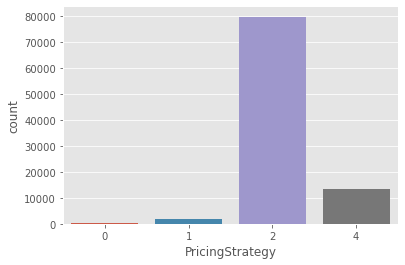

In [103]:
sns.countplot(df_dropped['PricingStrategy'])

In [104]:
pd.crosstab(df_dropped['PricingStrategy'], df_dropped['ProviderId'])

ProviderId,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6
PricingStrategy,,,,,,
0,44,0,69,58,161,53
1,0,0,1867,0,0,0
2,3706,18,1148,32719,8124,34133
4,1893,0,0,5412,6257,0


In [105]:
pd.crosstab(df_dropped['PricingStrategy'], df_dropped['ProductCategory'])

ProductCategory,airtime,data_bundles,financial_services,movies,other,ticket,transport,tv,utility_bill
PricingStrategy,,,,,,,,,
0,82,2,253,0,0,33,2,8,5
1,1536,62,10,9,2,9,2,62,175
2,30339,1165,45142,166,0,66,21,1209,1740
4,13070,384,0,0,0,108,0,0,0


<br />

**Observations**

- Majority of the providers used pricing strategy 2 to set their prices with pricing strategy 2 coming in second by some distance
- Pricing strategy 1 was one of the least used pricing strategy by the providers and was mainly used for airtime 

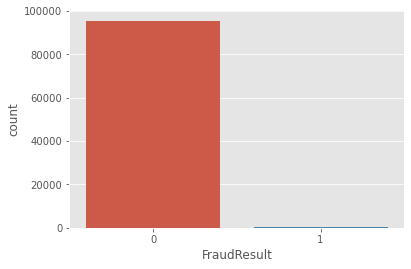

In [106]:
sns.countplot(df_dropped['FraudResult'])

In [107]:
pd.crosstab(df_dropped['FraudResult'], df_dropped['ChannelId'])

ChannelId,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_5
FraudResult,,,,
0,534,37136,56751,1048
1,4,5,184,0


In [108]:
pd.crosstab(df_dropped['ProductCategory'], df_dropped['FraudResult'])

FraudResult,0,1
ProductCategory,,
airtime,45009,18
data_bundles,1613,0
financial_services,45244,161
movies,175,0
other,2,0
ticket,216,0
transport,23,2
tv,1279,0
utility_bill,1908,12


In [109]:
pd.crosstab(df_dropped['ProviderId'], df_dropped['FraudResult'])

FraudResult,0,1
ProviderId,,
ProviderId_1,5586,57
ProviderId_2,18,0
ProviderId_3,3020,64
ProviderId_4,38184,5
ProviderId_5,14478,64
ProviderId_6,34183,3


<br />

**Observations**

- Majority of the fraudlent activities took place on ChannelId_3
- Most of the fraudlent activities were carried out during the provision of financial services
- It seems providers with a lower market share are more subsceptible to fraudlent activities. 

In [110]:
## save categorical variables in dataframe 

In [111]:
cat = df_dropped.select_dtypes(include='object')

**Encode Categorical Variables**

In [112]:
cat.drop(labels = 'TransactionStartTime', inplace = True, axis = 1)

/home/alahira/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
encoded_cat = pd.DataFrame()
cat_dummies = pd.DataFrame()

In [114]:
## instantiate LabelEncoder

In [115]:
encoder = LabelEncoder()

In [116]:
## encode categorical variable using LabelEncoder

In [117]:
encoded_cat['ProviderId']= encoder.fit_transform(cat['ProviderId'])
encoded_cat['ProductId']= encoder.fit_transform(cat['ProductId'])
encoded_cat['ProductCategory']= encoder.fit_transform(cat['ProductCategory'])
encoded_cat['ChannelId']= encoder.fit_transform(cat['ChannelId'])

In [118]:
## get dummies of categorical variable

In [119]:
cat_dummies = pd.get_dummies(data = cat)

**Scale Numeric Variables**

In [120]:
num_vars = df_dropped.select_dtypes(exclude=['object','category'])

In [121]:
scaler = StandardScaler() 

In [122]:
num_vars = num_vars.drop(labels = ['FraudResult','PricingStrategy'], axis = 1)
num_vars_scaled = scaler.fit_transform(num_vars)

In [123]:
num_vars_scaled = pd.DataFrame(data = num_vars_scaled, columns= num_vars.columns)

In [124]:
## merge processed dataframes 

In [125]:
num_plus_encoded = pd.merge(left = num_vars_scaled, right=encoded_cat, left_index=True, right_index=True)
num_plus_encoded = pd.merge(left = num_plus_encoded, right=new_df, left_index=True, right_index=True)
num_plus_encoded['FraudResult'] = df_dropped['FraudResult']

In [126]:
num_plus_dummies = pd.merge(left = num_vars_scaled, right=cat_dummies, left_index=True, right_index=True)
num_plus_dummies = pd.merge(left = num_plus_dummies, right=new_df, left_index=True, right_index=True)
num_plus_dummies['FraudResult'] = df_dropped['FraudResult']

In [127]:
## save dataframes to csv file

In [128]:
num_plus_dummies.to_csv(data_path + 'processed/num_plus_dummies.csv')
num_plus_encoded.to_csv(data_path + 'processed/num_plus_encoded.csv')